##Regression Example

In [ ]:
inputs = [[1],[2],[4]]
labels = [10, 20, 40]

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(inputs, labels)

LinearRegression()

In [ ]:
model.predict([[3]])

array([30.])

##Classification Example

In [ ]:
inputs = [[1],[2],[4]]
labels = [0,1,1]

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(inputs, labels)

LogisticRegression()

In [ ]:
model.predict([[3]])

array([1])

##Classification With More Than Two Classes

In [ ]:
inputs = [[1], [2], [4]]
labels = [0, 1, 2]

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(inputs, labels)

LogisticRegression()

In [ ]:
model.predict([[5]])

array([2])

##Multi-Label: Assigning More Than One Label

In [ ]:
inputs = [[1], [2], [4]]
labels = [[1,0,0],
          [0,1,0],
          [0,1,1]]

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
model = MultiOutputClassifier(estimator= LogisticRegression())
model.fit(inputs, labels)

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
model.predict([[5]])

array([[0, 1, 1]])

##Text Classification

###Getting the Dataset

In [ ]:
import pandas as pd
 
dataset_url = 'https://raw.githubusercontent.com/jalammar/ml/master/sst2/train.tsv'
df_train = pd.read_csv(dataset_url , delimiter='\t', names=['text', 'class'])

###Preparing the CountVectorizer for Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

countVec = CountVectorizer()
countVec.fit(df_train['text'].values)

CountVectorizer()

In [ ]:
train_vectors = countVec.transform(df_train['text'].values)

###Training the Classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC().fit(train_vectors, df_train['class'])

In [ ]:
test_set_url = 'https://raw.githubusercontent.com/jalammar/ml/master/sst2/test.tsv'
# Load the dataset
df_test = pd.read_csv(test_set_url, delimiter='\t', names=['text', 'class'])
 
# Transform text into vectors
test_vectors = countVec.transform(df_test['text'].values)
 
# Classify the test set and calculate accuracy score
classifier.score(test_vectors, df_test['class'])

0.7775947281713345

##Better Text Representation With TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
# Instantiate the TfIDFTransformer
tfidf_transformer = TfidfTransformer()
 
# Fit it against the vectors produced by the CountVectorizer
tfidf_transformer.fit(train_vectors)

# Now use it to create a new set of vectors representing the training set
tfidf_train_vectors = tfidf_transformer.transform(train_vectors)
 
# Train a SVM classifier using the TF-IDF vectors
clf_tfidf = SVC(random_state=0).fit(tfidf_train_vectors, df_train['class'])
 
# Predict the test set and calculate accuracy
test_vectors_tfidf = tfidf_transformer.transform(test_vectors)
clf_tfidf.score(test_vectors_tfidf, df_test['class'])

0.8061504667764964

##Clustering With K-Means

In [ ]:
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
 
# Create simple blobs dataset, make into a dataframe
df = pd.DataFrame(make_blobs(random_state=1)[0])
 
# Change column names
df.columns = ['feature_1', 'feature_2']
 
# Look at the first five examples
df.head()

,feature_1,feature_2
0,-0.794152,2.104951
1,-9.151552,-4.812864
2,-11.441826,-4.457814
3,-9.767618,-3.191337
4,-4.536556,-8.401863


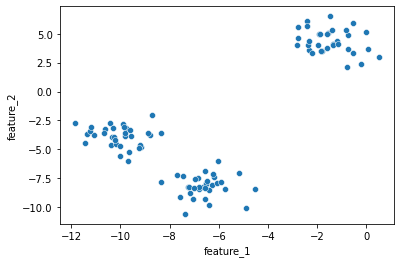

In [ ]:
sns.scatterplot(data=df, x='feature_1', y='feature_2')

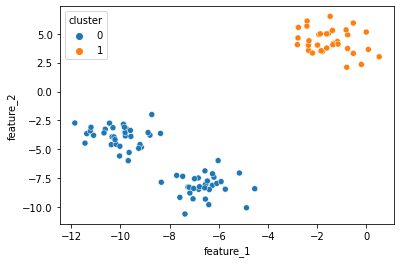

In [ ]:
from sklearn.cluster import KMeans

# Cluster with KMeans into two clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)

# Add the cluster assignments to the dataframe and plot
df['cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='cluster')

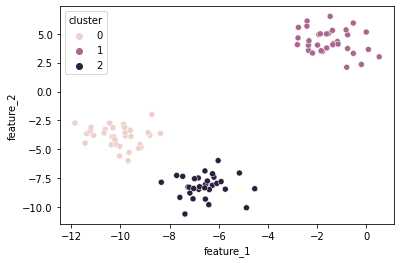

In [ ]:
from sklearn.cluster import KMeans

# Cluster with KMeans into three clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

# Add the cluster assignments to the dataframe and plot
df['cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='cluster')

##Dimensionality Reduction With Principal Component Analysis

In [1]:
import pandas as pd
 
dataset_url = 'https://raw.githubusercontent.com/jalammar/ml/master/data/2d-points.csv'
dataset = pd.read_csv(dataset_url)
dataset.head()

,feature_1,feature_2
0,2.020756,1.115161
1,0.711130,0.511567
2,0.578902,-0.052694
3,-0.712045,-0.275264
4,0.015652,0.563269


In [2]:
from sklearn.decomposition import PCA

# Instantiate a new PCA object to reduce dimensions into 1 feature dimension
pca = PCA(n_components=1)

# Reduce the dimensionality with PCA
pca.fit(dataset)

# Get our new feature column
new_dataset = pca.transform(dataset)

In [3]:
pca.explained_variance_ratio_

array([0.96928074])